# Titanic dataset 

## Defining the question 

### a) Specify the question 

We would like to predict if a passenger on the boat survived the ship wreck 

### b) Define the metric for success 

We would like our model to have an accuracy of 90%

### c) Understanding the context

The titanic was one of the largest boats in England however it hit a rock and the ship sunk. This led to many deaths as not everyone was bale to make it to safety. We would like to take this opportunity to predict whether someone would survive given where they embarked from , their class , and the gender. 

### d) Recording the experimental design 

We will use the following method to conduct our experiment : 

1.   Read the dataset 
1.   Check the dataset 
1.   Clean the dataset
2.   Perform exploratory analysis 
2.   Implement the soloution
2.   Challenge the soloution 



## Reading the data 

#### The first dataset 

In [359]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [360]:
# Using pandas to read the dataset 
df = pd.read_csv('/content/train (5).csv')

#### The second dataset 

In [361]:
# Using pandas to read the dataset 
data = pd.read_csv('/content/test (1).csv')

## Checking the data 

#### The first dataset 

In [362]:
# Checking the top of the dataset 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [363]:
#Checking the bottom of the dataset 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [364]:
# Checking the size of the dataset 
df.shape

(891, 12)

In [365]:
# Checking the datatypes of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### The second dataset 

In [366]:
#Checking the top of the dataset 
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [367]:
# Checking the bottom of the dataset 
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [368]:
# Checking the size of the dataset 
data.shape

(418, 11)

In [369]:
# Checking the data types of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Cleaning the dataset 

### The first dataset

#### General cleaning 

In [370]:
# Checking if there are missing values in the dataset 
tot = df.isnull().sum()
tot

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [371]:
# Getting the propertion of missing data 
mask = (tot.sum() / df.shape[0]) * 100
mask

97.19416386083053

In [372]:
# Filling in the missing records 
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin']= df['Cabin'].fillna('Unknown')


In [373]:
# Dropping the rest of the missing values
df = df.dropna()

In [374]:
# Confirming there are no missing values 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [375]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [376]:
# Checking if all the variables have the right datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [377]:
# Checking for duplicates 
df.duplicated().sum()

0

In [378]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [379]:
# Dropping columns we will not be using in the analysis 
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [380]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Checking for outliers and anomalies 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

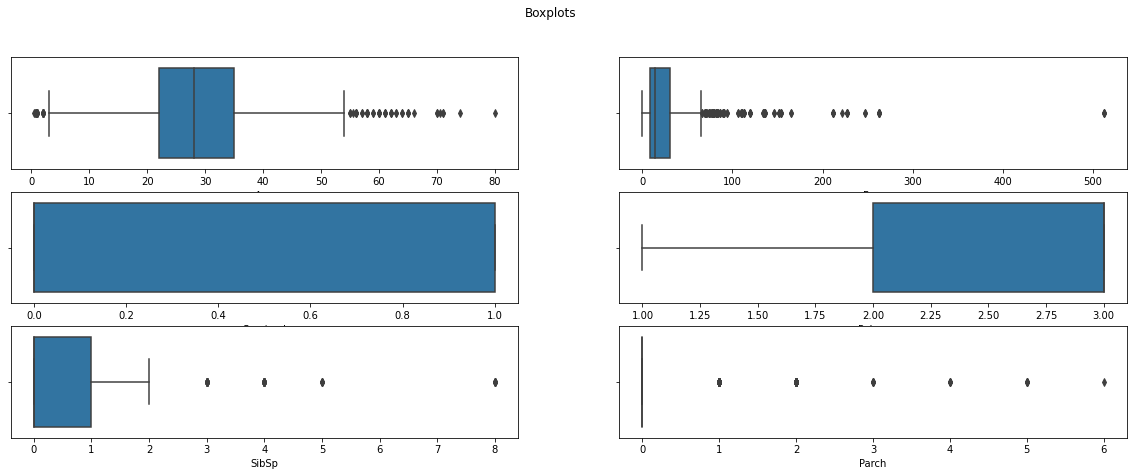

In [381]:
# Checking for outliers 
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(20, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['Age'], ax=ax1)
sns.boxplot(df['Fare'], ax=ax2)
sns.boxplot(df['Survived'], ax=ax3)
sns.boxplot(df['Pclass'], ax=ax4)
sns.boxplot(df['SibSp'], ax=ax5)
sns.boxplot(df['Parch'], ax=ax6)

In [382]:
# Checking for anomalies 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(mask)

Age          65
Embarked      0
Fare        114
Parch       213
Pclass        0
Sex           0
SibSp        46
Survived      0
dtype: int64


In [383]:
# Checking what percentage of the data the anomalies occupy 
percentage = (mask / df.shape[0]) * 100
percentage.sum()

49.26884139482565

### The second dataset 

#### General data cleaning 

In [384]:
# Checking for null values 
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [385]:
# Checking what proportion of the dataset the missing values take 
mask = (tot.sum() / data.shape[0]) * 100
mask

207.17703349282294

In [386]:
# Filling the missing data with the appropraite means
data['Cabin']= data['Cabin'].fillna('Unknown')
data['Age']= data['Age'].fillna(data['Age'].median())

In [387]:
# Dropping further missing data 
data= data.dropna()

In [388]:
# Confirming there are no missing values 
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [389]:
# Checking if each column has the correct datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        417 non-null    object 
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.1+ KB


In [390]:
# Checking if there are duplicates in the dataset
data.duplicated().sum()

0

In [391]:
# Dropping columns we dont need in the analysis 
data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

#### Checking for outliers and anomalies 

In [392]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

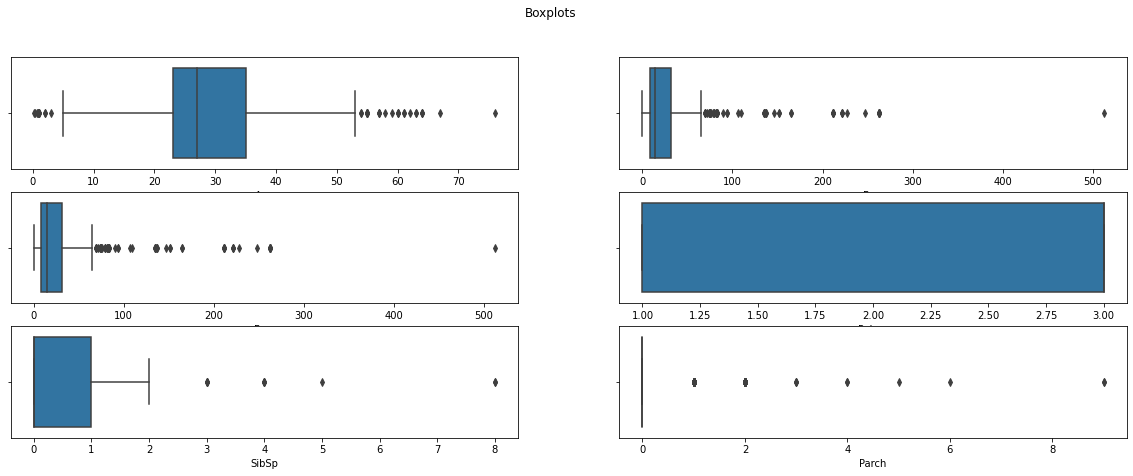

In [393]:
# Checking to see the outliers 
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(20, 7))
fig.suptitle('Boxplots')
sns.boxplot(data['Age'], ax=ax1)
sns.boxplot(data['Fare'], ax=ax2)
sns.boxplot(data['Fare'], ax=ax3)
sns.boxplot(data['Pclass'], ax=ax4)
sns.boxplot(data['SibSp'], ax=ax5)
sns.boxplot(data['Parch'], ax=ax6)

In [394]:
# Checking for anomalies 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(mask)

Age         37
Embarked     0
Fare        55
Parch       94
Pclass       0
Sex          0
SibSp       11
dtype: int64


In [395]:
# Checking what percentage of the data the anomalies occupy 
percentage = (mask / data.shape[0]) * 100
percentage.sum()

47.24220623501199

## Exploratory Data Analysis 

### Univariate Analysis 

In [396]:
# Separating the categorical columns from the numeric ones 
X = df.drop(['Sex','Embarked'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


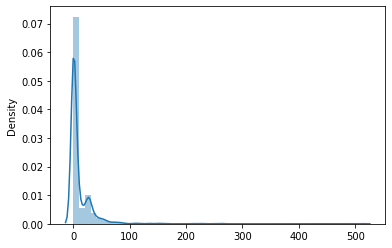

In [397]:
# Getting the distribution of the dataset
sns.distplot(X)

In [398]:
# Getting the mode to all the columns except passenger ID 
df.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,28.0,0,0,8.05,S


In [399]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.508010
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

In [400]:
df.kurt()

Survived    -1.769179
Pclass      -1.269437
Age          1.007820
SibSp       17.838972
Parch        9.750592
Fare        33.508477
dtype: float64

In [401]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Exploratory Analysis 

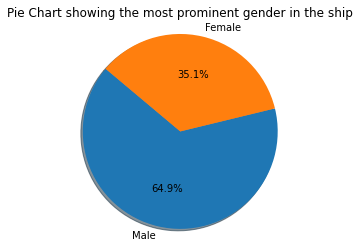

In [402]:
vals = df['Sex'].value_counts()
vals
names = ['Male','Female']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the most prominent gender in the ship')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


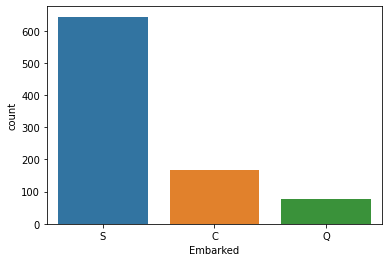

In [403]:
# Getting the count of the people who mounted at the different places 
sns.countplot(df['Embarked'])

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

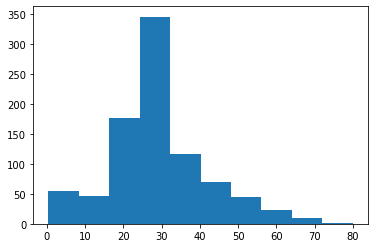

In [404]:
plt.hist(df['Age'])

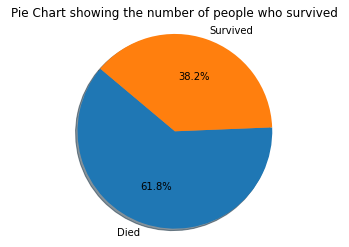

In [405]:
vals = df['Survived'].value_counts()
names = ['Died','Survived']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the number of people who survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


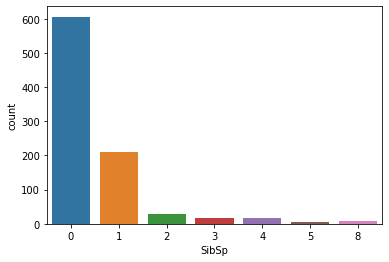

In [406]:
sns.countplot(df['SibSp'])

(array([676., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

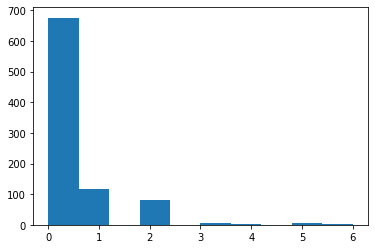

In [407]:
plt.hist(df['Parch'])

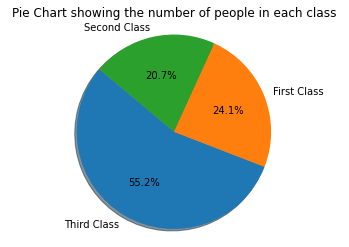

In [408]:
vals = df['Pclass'].value_counts()
vals
names = ['Third Class','First Class','Second Class']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the number of people in each class')
plt.show()

### Bivariate Analysis 

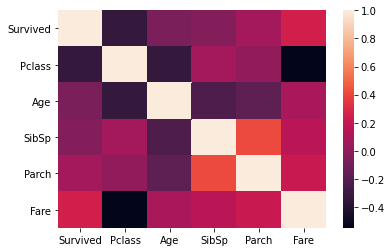

In [409]:
# Getting the correlation of the columns to each other 
sns.heatmap(df.corr())

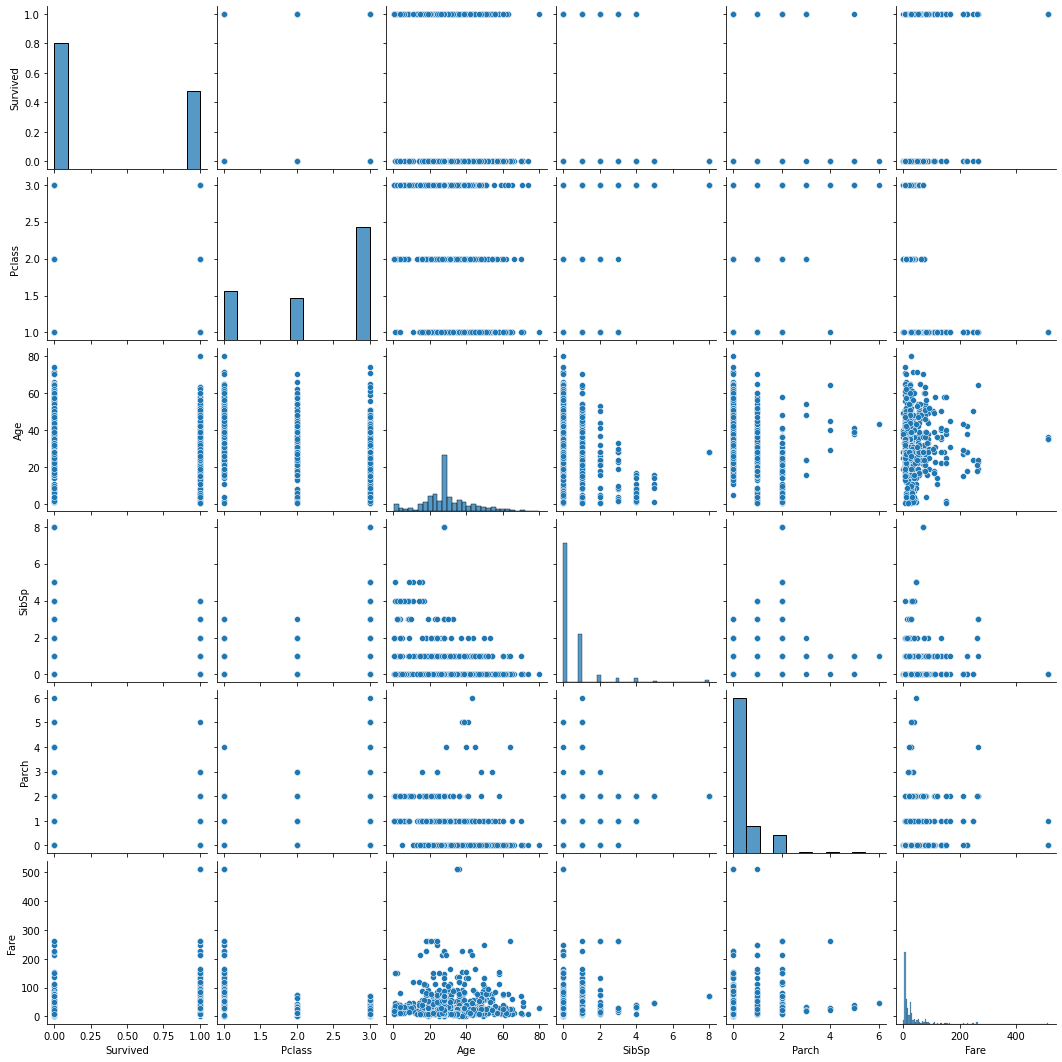

In [410]:
#Getting to see the scatter plots for the correlation to better understand the dataset.
sns.pairplot(df)

## Implementing the soloution 

### Round 1:

#### Preparing the dataset 

In [411]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [412]:
# Changing the categorical columns to numeric columns to better train our models 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
listt = ['Sex','Embarked']
for x in df[listt]:
 df[x]= le.fit_transform(df[x])

In [413]:
# Splitting to features and labels 
X = df.drop('Survived',axis=1)
y = df['Survived']

In [414]:
# Importing standard scaler to scale our data and reduce the effect of outliers 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [415]:
# We deal with class imbalance by over sampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)
print(x_ros.shape,y_ros.shape)

(1098, 7) (1098,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [416]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.2,random_state=0)

#### Modelling 

In [417]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [418]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [419]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7272727272727273

In [420]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76 38]
 [22 84]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       114
           1       0.69      0.79      0.74       106

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220



### Round 2 : 

#### Preparing the dataset 

In [444]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=0)

#### Modelling 

In [422]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [423]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [424]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7151515151515152

In [425]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  58]
 [ 36 127]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       167
           1       0.69      0.78      0.73       163

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.71       330
weighted avg       0.72      0.72      0.71       330



### Round 3 : 

#### Preparing the dataset 

In [426]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.1,random_state=0)

#### Modelling 

In [427]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [428]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [429]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7272727272727273

In [430]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36 20]
 [10 44]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.71        56
           1       0.69      0.81      0.75        54

    accuracy                           0.73       110
   macro avg       0.74      0.73      0.73       110
weighted avg       0.74      0.73      0.73       110



### Optimizing the performance 

We shall be using pca to conduct dimensionality reduction 

#### Preparing the data 

In [431]:
# Using PCA to get two components to use in the answer
from sklearn.decomposition import PCA
pca = PCA(n_components=1)


In [432]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

#### Modelling 

In [433]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [434]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [435]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6545454545454545

In [436]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39 17]
 [21 33]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        56
           1       0.66      0.61      0.63        54

    accuracy                           0.65       110
   macro avg       0.66      0.65      0.65       110
weighted avg       0.65      0.65      0.65       110



## Challenging the soloution 

To challenge the soloution I will be doing hyper parameter tuning to find the best parameters to use in my classifier 

In [449]:
# Splitting to train and test 
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.1,random_state=0)

In [459]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
metric = ['minkowski','euclidean','manhattan']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,metric=metric)

In [460]:
# Importing the random search CV 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(KNeighborsClassifier(), hyperparameters) 

In [461]:
# Fitting the random search CV 
random_sr.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'euclidean',
     

In [462]:
# Getting the best parameters to use 
best_parameters = random_sr.best_params_
print(best_parameters)

{'p': 1, 'n_neighbors': 7, 'metric': 'manhattan', 'leaf_size': 31}


In [463]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=2,n_neighbors=1,leaf_size=3,metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [464]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [465]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7454545454545455

In [466]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37 19]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.73        56
           1       0.70      0.83      0.76        54

    accuracy                           0.75       110
   macro avg       0.75      0.75      0.74       110
weighted avg       0.75      0.75      0.74       110



## Finding answers for our test data 

#### Preparing the test dataset 

In [476]:
data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0


In [478]:
# Changing the categorical columns to numeric columns to better train our models 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
listt = ['Sex','Embarked']
for x in data[listt]:
 data[x]= le.fit_transform(data[x])

In [480]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [479]:
data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0


In [482]:
# Creating a column in the test dataset 
data['Survived']= 0 

In [483]:
# Allocating test and train data 
X_train = X 
X_test = data.drop('Survived',axis=1) 
y_train = df['Survived']

In [484]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [493]:
# We deal with class imbalance by over sampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_ros = ros.fit_resample(X_train,y_train)
print(x_ros.shape,y_ros.shape)

(1098, 7) (1098,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Modelling

In [494]:
 #List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
metric = ['minkowski','euclidean','manhattan']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,metric=metric)

In [495]:
# Importing the random search CV 
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(KNeighborsClassifier(), hyperparameters)

In [496]:
# Fitting the random search CV 
random_sr.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'euclidean',
     

In [497]:
# Getting the best parameters to use 
best_parameters = random_sr.best_params_
print(best_parameters)

{'p': 1, 'n_neighbors': 17, 'metric': 'manhattan', 'leaf_size': 7}


In [498]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(p=1,n_neighbors=17,leaf_size=7,metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=7, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')

In [499]:
# Predicting the score 
y_pred = classifier.predict(X_test)

In [507]:
df = pd.DataFrame({'Y_pred': y_pred})
df

,Y_pred
0,0
1,0
2,0
3,0
4,0
...,...
412,0
413,1
414,0
415,0


In [508]:
df['Survived']= y_pred

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


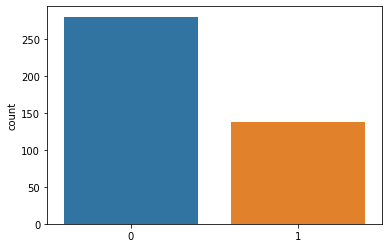

In [500]:
sns.countplot(y_pred)

## Our findings 

We found that in our test dataset most of the people did not survive. 